In [1]:
import warnings
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from src import utils, plotting
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', '{:,.2f}'.format)

In [2]:
ticker = "SHEL.L"
stock = yf.Ticker(ticker.upper())
history = stock.history(period='max')

In [3]:
history.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,"7,190.00","7,190.00","7,190.00","7,190.00","7,190.00","7,190.00","7,190.00"
mean,"1,388.81","1,399.53","1,376.29","1,388.66","5,692,029.83",0.28,0.00
std,658.34,663.18,652.82,658.43,"7,931,663.03",2.78,0.00
min,562.05,585.84,2.46,549.73,0.00,0.00,0.00
25%,"1,016.18","1,021.81","1,010.61","1,016.45","312,315.50",0.00,0.00
50%,"1,219.44","1,229.00","1,209.19","1,220.72","3,760,286.00",0.00,0.00
75%,"1,545.95","1,548.34","1,545.95","1,545.95","7,120,889.00",0.00,0.00
max,"4,805.15","4,827.34","4,805.15","4,805.15","138,187,438.00",38.64,0.00


In [4]:
stock.info

{'address1': 'Shell Centre',
 'city': 'London',
 'zip': 'SE1 7NA',
 'country': 'United Kingdom',
 'phone': '44 20 7934 1234',
 'website': 'https://www.shell.com',
 'industry': 'Oil & Gas Integrated',
 'industryKey': 'oil-gas-integrated',
 'industryDisp': 'Oil & Gas Integrated',
 'sector': 'Energy',
 'sectorKey': 'energy',
 'sectorDisp': 'Energy',
 'longBusinessSummary': 'Shell plc operates as an energy and petrochemical company Europe, Asia, Oceania, Africa, the United States, and Rest of the Americas. The company operates through Integrated Gas, Upstream, Marketing, Chemicals and Products, and Renewables and Energy Solutions segments. It explores for and extracts crude oil, natural gas, and natural gas liquids; markets and transports oil and gas; produces gas-to-liquids fuels and other products; and operates upstream and midstream infrastructure to deliver gas to market. The company also markets and trades natural gas, liquefied natural gas (LNG), crude oil, electricity, carbon-emissi

In [5]:
stock.financials

,2023-12-31,2022-12-31,2021-12-31,2020-12-31,2019-12-31
Tax Effect Of Unusual Items,"84,800,000.00","625,260,000.00","1,858,140,000.00","50,800,000.00",NaN
Tax Rate For Calcs,0.40,0.34,0.31,0.20,NaN
Normalized EBITDA,"68,333,000,000.00","84,757,000,000.00","54,362,000,000.00","29,280,000,000.00",NaN
Total Unusual Items,"212,000,000.00","1,839,000,000.00","5,994,000,000.00","254,000,000.00",NaN
Total Unusual Items Excluding Goodwill,"212,000,000.00","1,839,000,000.00","5,994,000,000.00","254,000,000.00",NaN
Net Income From Continuing Operation Net Minority Interest,"19,359,000,000.00","42,309,000,000.00","20,101,000,000.00","-21,680,000,000.00",NaN
Reconciled Depreciation,"31,290,000,000.00","18,529,000,000.00","26,921,000,000.00","52,444,000,000.00",NaN
Reconciled Cost Of Revenue,"269,413,000,000.00","302,535,000,000.00","225,655,000,000.00","193,538,000,000.00",NaN
EBITDA,"68,545,000,000.00","86,596,000,000.00","60,356,000,000.00","29,534,000,000.00",NaN
EBIT,"37,255,000,000.00","68,067,000,000.00","33,435,000,000.00","-22,910,000,000.00",NaN


In [6]:
stock.cash_flow

,2023-12-31,2022-12-31,2021-12-31,2020-12-31,2019-12-31
Free Cash Flow,"31,198,000,000.00","45,814,000,000.00","26,104,000,000.00","17,520,000,000.00",NaN
Repurchase Of Capital Stock,"-15,506,000,000.00","-19,030,000,000.00","-3,174,000,000.00","-2,084,000,000.00",NaN
Repayment Of Debt,"-10,650,000,000.00","-8,459,000,000.00","-21,534,000,000.00","-17,385,000,000.00",NaN
Issuance Of Debt,"1,029,000,000.00","269,000,000.00","1,791,000,000.00","23,033,000,000.00",NaN
Capital Expenditure,"-22,993,000,000.00","-22,600,000,000.00","-19,000,000,000.00","-16,585,000,000.00",NaN
End Cash Position,"38,774,000,000.00","40,246,000,000.00","36,970,000,000.00","31,830,000,000.00",NaN
Beginning Cash Position,"40,246,000,000.00","36,970,000,000.00","31,830,000,000.00","18,055,000,000.00",NaN
Effect Of Exchange Rate Changes,"306,000,000.00","-736,000,000.00","-539,000,000.00","172,000,000.00",NaN
Changes In Cash,"-1,778,000,000.00","4,012,000,000.00","5,679,000,000.00","13,603,000,000.00",NaN
Financing Cash Flow,"-38,235,000,000.00","-41,954,000,000.00","-34,664,000,000.00","-7,224,000,000.00",NaN


In [7]:
stock.balance_sheet

,2023-12-31,2022-12-31,2021-12-31,2020-12-31,2019-12-31
Treasury Shares Number,0.00,0.00,0.00,0.00,NaN
Ordinary Shares Number,"6,524,109,049.00","7,003,503,393.00","7,684,132,453.00","7,807,423,335.00",NaN
Share Issued,"6,524,109,049.00","7,003,503,393.00","7,684,132,453.00","7,807,423,335.00",NaN
Net Debt,"15,058,000,000.00","16,062,000,000.00","24,722,000,000.00","47,829,000,000.00",NaN
Total Debt,"81,541,000,000.00","83,795,000,000.00","89,086,000,000.00","108,014,000,000.00",NaN
...,...,...,...,...,...
Gross Accounts Receivable,"36,873,000,000.00","40,389,000,000.00","35,748,000,000.00","22,242,000,000.00",NaN
Cash Cash Equivalents And Short Term Investments,"38,774,000,000.00","40,090,000,000.00","36,857,000,000.00","31,765,000,000.00",NaN
Cash And Cash Equivalents,"38,774,000,000.00","40,090,000,000.00","36,857,000,000.00","31,765,000,000.00",NaN
Cash Equivalents,"32,888,000,000.00",NaN,NaN,NaN,"13,887,000,000.00"


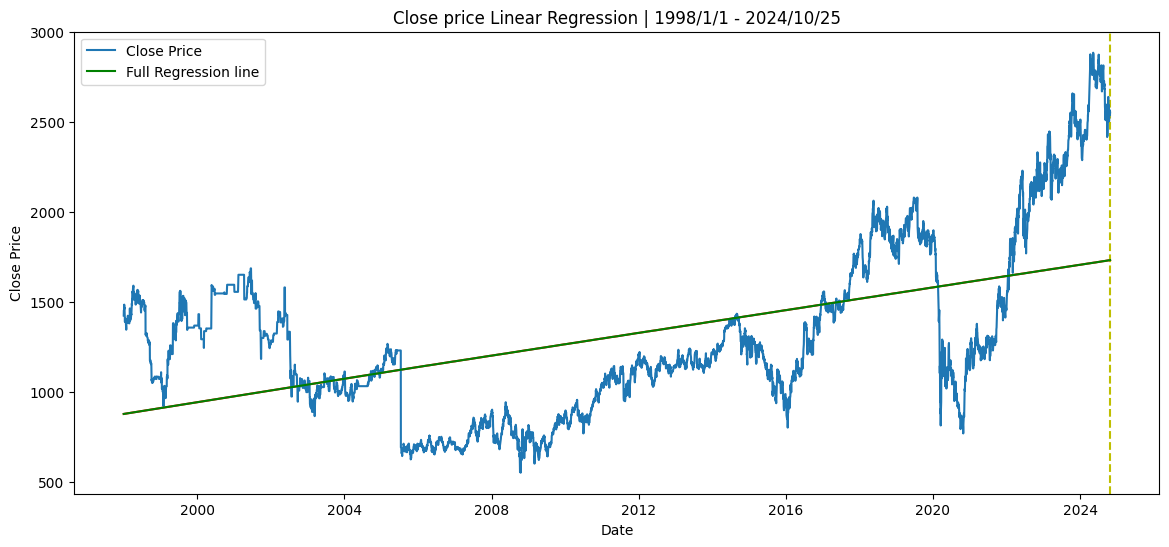

Coefficient (slope): 0.12499270349862708


In [8]:
a = plotting.plot_regression_line(history["1998":], reg_line_count=1, log_scale=False)

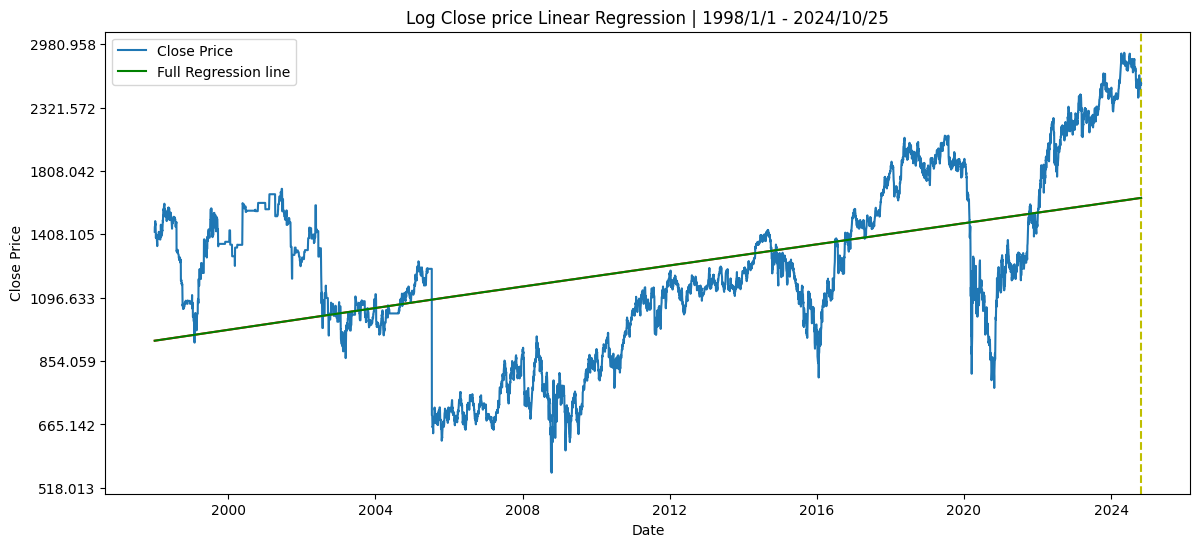

Coefficient (slope): 8.24173817733887e-05


<module 'matplotlib.pyplot' from '/Users/ivankyulev/Projects/Notebooks/.venv/lib/python3.11/site-packages/matplotlib/pyplot.py'>

In [9]:
plotting.plot_regression_line(history["1998":], reg_line_count=1, log_scale=True)

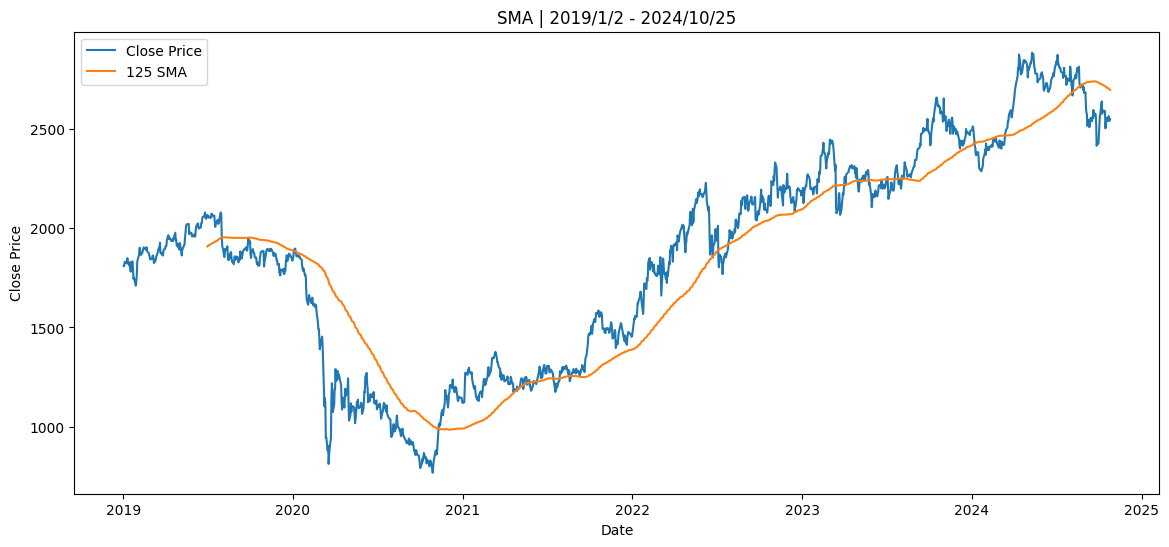

<module 'matplotlib.pyplot' from '/Users/ivankyulev/Projects/Notebooks/.venv/lib/python3.11/site-packages/matplotlib/pyplot.py'>

In [10]:
plotting.plot_sma(history["2019":], [125], hide_data=False)

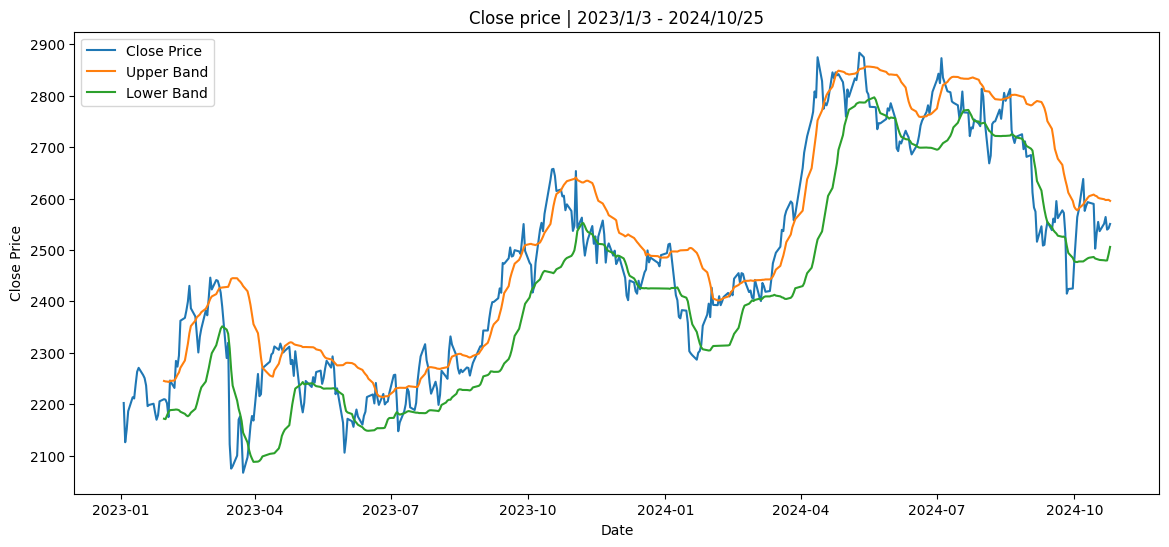

In [11]:
plotting.plot_bolinger_bands(history["2023":], 20, 1)

In [12]:
import pandas as pd
from ta.utils import dropna
from ta.volatility import BollingerBands


# Load datas
df = history['2023-07-15':]


# Initialize Bollinger Bands Indicator
indicator_bb = BollingerBands(close=df["Close"], window=20, window_dev=2)

# Add Bollinger Bands features
df['bb_bbm'] = indicator_bb.bollinger_mavg()
df['bb_bbh'] = indicator_bb.bollinger_hband()
df['bb_bbl'] = indicator_bb.bollinger_lband()

# Add Bollinger Band high indicator
df['bb_bbhi'] = indicator_bb.bollinger_hband_indicator()

# Add Bollinger Band low indicator
df['bb_bbli'] = indicator_bb.bollinger_lband_indicator()

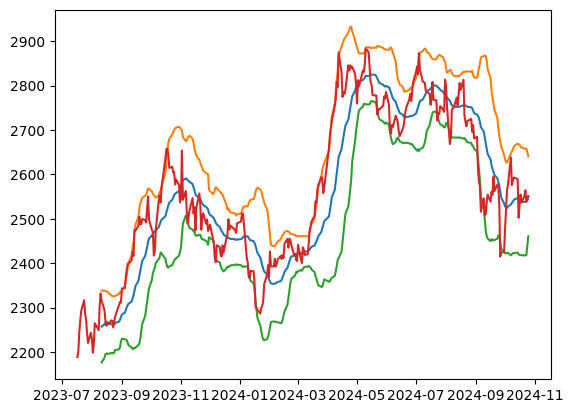

In [13]:
plt.plot(df['bb_bbm'])
plt.plot(df['bb_bbh'])
plt.plot(df['bb_bbl'])
plt.plot(df['Close'])